(512, 512, 3)


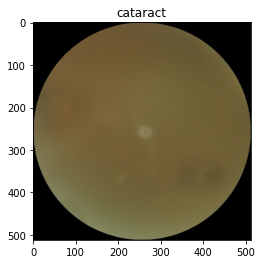

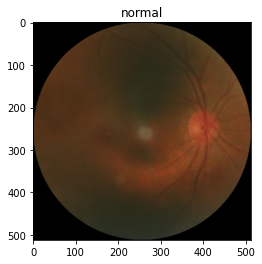

In [25]:
import matplotlib.pyplot as plt

import skimage.io as io
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import threshold_mean, sobel
from skimage.color import rgb2gray
import numpy as np
import pandas as pd

def print_img(title, image):
    plt.title(title)
    if len(image.shape) >= 3 and min(image.shape) > 1:
        plt.imshow(image)
    else:
        plt.imshow(image, cmap=plt.cm.gray)
    plt.show()

base_dir = "../../data"

cataract = io.imread(f'{base_dir}/preprocessed_images/0_left.jpg')
normal = io.imread(f'{base_dir}/preprocessed_images/0_right.jpg')

print(cataract.shape)

print_img('cataract', cataract)
print_img('normal', normal)



# Algoritmo para detectar catarata:
# 1. Rodar um sobels
# se aparecerem veias, descartar
# se não aparecerem:
# testar Specularity = refractive media opacity
# https://github.com/muratkrty/specularity-removal
# http://alexandremorgand.fr/Morgand_Tamaazousti_VISAPP14.pdf
# se detectar acima de um minimo = opacity, caso contrário, 
# cataract




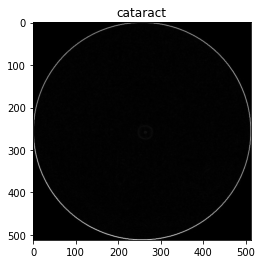

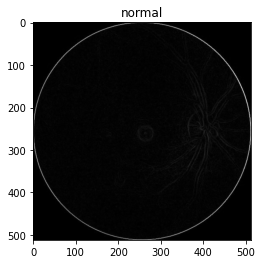

In [22]:
from skimage import feature
#mean_cataract = threshold_mean(cataract)
#mean_normal = threshold_mean(normal)

sobel_cataract = sobel(cataract.copy())
sobel_normal = sobel(normal.copy())

#thr_cataract[thr_cataract < 2*mean_cataract] = 0
#thr_normal[thr_normal < 2*mean_normal] = 0

print_img('cataract', sobel_cataract)
print_img('normal', sobel_normal)

In [23]:
data = pd.read_csv(f'{base_dir}/ODIR-5K/data.csv') 


In [24]:

#print(data.head())
#print(data[data['Left-Diagnostic Keywords'] == 'refractive media opacity'].head())
print(data[data['Left-Diagnostic Keywords'] == 'cataract'].head())

      ID  Patient Age Patient Sex   Left-Fundus   Right-Fundus  \
0      0           69      Female    0_left.jpg    0_right.jpg   
103  103           55      Female  103_left.jpg  103_right.jpg   
119  119           59        Male  119_left.jpg  119_right.jpg   
253  254           60      Female  254_left.jpg  254_right.jpg   
293  294           69      Female  294_left.jpg  294_right.jpg   

    Left-Diagnostic Keywords    Right-Diagnostic Keywords  N  D  G  C  A  H  \
0                   cataract                normal fundus  0  0  0  1  0  0   
103                 cataract                normal fundus  0  0  0  1  0  0   
119                 cataract                       drusen  0  0  0  1  0  0   
253                 cataract  macular epiretinal membrane  0  0  0  1  0  0   
293                 cataract                normal fundus  0  0  0  1  0  0   

     M  O  
0    0  0  
103  0  0  
119  0  1  
253  0  1  
293  0  0  
